In [2]:
import pandas as pd
from sklearn import preprocessing
from IPython.display import display, HTML

df=pd.read_csv('Base.csv')
for i in df.columns:
    print(i, ',', df[i].dtype,',',df[i].isnull().any())
display(HTML(df.head(10).to_html()))
print(df['source'].unique())
print(df['fraud_bool'].unique())



fraud_bool , int64 , False
income , float64 , False
name_email_similarity , float64 , False
prev_address_months_count , int64 , False
current_address_months_count , int64 , False
customer_age , int64 , False
days_since_request , float64 , False
intended_balcon_amount , float64 , False
payment_type , object , False
zip_count_4w , int64 , False
velocity_6h , float64 , False
velocity_24h , float64 , False
velocity_4w , float64 , False
bank_branch_count_8w , int64 , False
date_of_birth_distinct_emails_4w , int64 , False
employment_status , object , False
credit_risk_score , int64 , False
email_is_free , int64 , False
housing_status , object , False
phone_home_valid , int64 , False
phone_mobile_valid , int64 , False
bank_months_count , int64 , False
has_other_cards , int64 , False
proposed_credit_limit , float64 , False
foreign_request , int64 , False
source , object , False
session_length_in_minutes , float64 , False
device_os , object , False
keep_alive_session , int64 , False
device_dist

,fraud_bool,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,payment_type,zip_count_4w,velocity_6h,velocity_24h,velocity_4w,bank_branch_count_8w,date_of_birth_distinct_emails_4w,employment_status,credit_risk_score,email_is_free,housing_status,phone_home_valid,phone_mobile_valid,bank_months_count,has_other_cards,proposed_credit_limit,foreign_request,source,session_length_in_minutes,device_os,keep_alive_session,device_distinct_emails_8w,device_fraud_count,month
0,0,0.3,0.986506,-1,25,40,0.006735,102.453711,AA,1059,13096.035018,7850.955007,6742.080561,5,5,CB,163,1,BC,0,1,9,0,1500.0,0,INTERNET,16.224843,linux,1,1,0,0
1,0,0.8,0.617426,-1,89,20,0.010095,-0.849551,AD,1658,9223.283431,5745.251481,5941.664859,3,18,CA,154,1,BC,1,1,2,0,1500.0,0,INTERNET,3.363854,other,1,1,0,0
2,0,0.8,0.996707,9,14,40,0.012316,-1.490386,AB,1095,4471.472149,5471.988958,5992.555113,15,11,CA,89,1,BC,0,1,30,0,200.0,0,INTERNET,22.730559,windows,0,1,0,0
3,0,0.6,0.475100,11,14,30,0.006991,-1.863101,AB,3483,14431.993621,6755.344479,5970.336831,11,13,CA,90,1,BC,0,1,1,0,200.0,0,INTERNET,15.215816,linux,1,1,0,0
4,0,0.9,0.842307,-1,29,40,5.742626,47.152498,AA,2339,7601.511579,5124.046930,5940.734212,1,6,CA,91,0,BC,1,1,26,0,200.0,0,INTERNET,3.743048,other,0,1,0,0
5,0,0.6,0.294840,-1,369,30,0.024232,-1.232556,AD,1204,11556.955514,7506.951276,6482.924037,705,5,CB,134,1,BE,1,1,30,0,200.0,0,INTERNET,6.987316,linux,1,1,0,0
6,0,0.2,0.773085,22,4,40,0.006919,-0.544676,AB,1998,11723.993606,7864.277144,6338.799156,28,8,CA,72,1,BC,1,1,1,0,200.0,0,INTERNET,28.199923,x11,1,1,0,0
7,0,0.8,0.153880,-1,103,40,0.045122,-1.101184,AB,1548,4999.555801,4526.861667,6426.790817,6,7,CA,163,0,BE,1,1,25,1,200.0,0,INTERNET,11.234264,other,1,1,0,0
8,0,0.3,0.523655,21,2,30,0.035206,-0.955737,AB,1781,6979.994002,4335.685346,6624.957942,2,10,CA,35,0,BC,1,0,2,0,200.0,0,INTERNET,5.329387,other,1,1,0,0
9,0,0.8,0.834475,-1,134,20,0.017245,-1.356393,AD,3113,7549.992086,6273.922110,6312.998835,14,20,CA,201,1,BD,1,1,15,0,1500.0,0,INTERNET,4.103970,other,1,1,0,0


['INTERNET' 'TELEAPP']
[0 1]


In [3]:

df_norm=df.copy(deep=True)
display(HTML(df_norm.head(10).to_html()))

# Here we are converting categorical data to numerical data
print(df_norm['payment_type'].dtype)
print(df_norm['employment_status'].dtype)
print(df_norm['housing_status'].dtype)
print(df_norm['device_os'].dtype)
print(df_norm['source'].dtype)

df_dummies_payment_type=pd.get_dummies(df_norm['payment_type'],dtype=float)
print(df_dummies_payment_type.head(10))
df_dummies_employment_status=pd.get_dummies(df_norm['employment_status'],dtype=float)
print(df_dummies_employment_status.head(10))
df_dummies_housing_status=pd.get_dummies(df_norm['housing_status'],dtype=float)
print(df_dummies_housing_status.head(10))
df_dummies_device_os=pd.get_dummies(df_norm['device_os'],dtype=float)
print(df_dummies_device_os.head(10))
df_dummies_source=pd.get_dummies(df_norm['source'],dtype=float)
print(df_dummies_source.head(10))

# Here we are addimg binary variables to dataframe
df_norm=df_norm.join(df_dummies_payment_type)
df_norm=df_norm.join(df_dummies_employment_status)
df_norm=df_norm.join(df_dummies_housing_status)
df_norm=df_norm.join(df_dummies_device_os)
df_norm=df_norm.join(df_dummies_source)

# Here we are removing the original categorical variable
df_norm=df_norm.drop('payment_type', axis=1)
df_norm=df_norm.drop('employment_status', axis=1)
df_norm=df_norm.drop('housing_status', axis=1)
df_norm=df_norm.drop('device_os', axis=1)
df_norm=df_norm.drop('source', axis=1)

display(HTML(df_norm.head(10).to_html()))

# Here we are doing N-1 binary variable so we are dropping 1 column
df_norm=df_norm.drop('AB', axis=1)
df_norm=df_norm.drop('CA', axis=1)
df_norm=df_norm.drop('BC', axis=1)
df_norm=df_norm.drop('other', axis=1)
df_norm=df_norm.drop('TELEAPP', axis=1)


display(HTML(df_norm.head(10).to_html()))

,fraud_bool,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,payment_type,zip_count_4w,velocity_6h,velocity_24h,velocity_4w,bank_branch_count_8w,date_of_birth_distinct_emails_4w,employment_status,credit_risk_score,email_is_free,housing_status,phone_home_valid,phone_mobile_valid,bank_months_count,has_other_cards,proposed_credit_limit,foreign_request,source,session_length_in_minutes,device_os,keep_alive_session,device_distinct_emails_8w,device_fraud_count,month
0,0,0.3,0.986506,-1,25,40,0.006735,102.453711,AA,1059,13096.035018,7850.955007,6742.080561,5,5,CB,163,1,BC,0,1,9,0,1500.0,0,INTERNET,16.224843,linux,1,1,0,0
1,0,0.8,0.617426,-1,89,20,0.010095,-0.849551,AD,1658,9223.283431,5745.251481,5941.664859,3,18,CA,154,1,BC,1,1,2,0,1500.0,0,INTERNET,3.363854,other,1,1,0,0
2,0,0.8,0.996707,9,14,40,0.012316,-1.490386,AB,1095,4471.472149,5471.988958,5992.555113,15,11,CA,89,1,BC,0,1,30,0,200.0,0,INTERNET,22.730559,windows,0,1,0,0
3,0,0.6,0.475100,11,14,30,0.006991,-1.863101,AB,3483,14431.993621,6755.344479,5970.336831,11,13,CA,90,1,BC,0,1,1,0,200.0,0,INTERNET,15.215816,linux,1,1,0,0
4,0,0.9,0.842307,-1,29,40,5.742626,47.152498,AA,2339,7601.511579,5124.046930,5940.734212,1,6,CA,91,0,BC,1,1,26,0,200.0,0,INTERNET,3.743048,other,0,1,0,0
5,0,0.6,0.294840,-1,369,30,0.024232,-1.232556,AD,1204,11556.955514,7506.951276,6482.924037,705,5,CB,134,1,BE,1,1,30,0,200.0,0,INTERNET,6.987316,linux,1,1,0,0
6,0,0.2,0.773085,22,4,40,0.006919,-0.544676,AB,1998,11723.993606,7864.277144,6338.799156,28,8,CA,72,1,BC,1,1,1,0,200.0,0,INTERNET,28.199923,x11,1,1,0,0
7,0,0.8,0.153880,-1,103,40,0.045122,-1.101184,AB,1548,4999.555801,4526.861667,6426.790817,6,7,CA,163,0,BE,1,1,25,1,200.0,0,INTERNET,11.234264,other,1,1,0,0
8,0,0.3,0.523655,21,2,30,0.035206,-0.955737,AB,1781,6979.994002,4335.685346,6624.957942,2,10,CA,35,0,BC,1,0,2,0,200.0,0,INTERNET,5.329387,other,1,1,0,0
9,0,0.8,0.834475,-1,134,20,0.017245,-1.356393,AD,3113,7549.992086,6273.922110,6312.998835,14,20,CA,201,1,BD,1,1,15,0,1500.0,0,INTERNET,4.103970,other,1,1,0,0


object
object
object
object
object
    AA   AB   AC   AD   AE
0  1.0  0.0  0.0  0.0  0.0
1  0.0  0.0  0.0  1.0  0.0
2  0.0  1.0  0.0  0.0  0.0
3  0.0  1.0  0.0  0.0  0.0
4  1.0  0.0  0.0  0.0  0.0
5  0.0  0.0  0.0  1.0  0.0
6  0.0  1.0  0.0  0.0  0.0
7  0.0  1.0  0.0  0.0  0.0
8  0.0  1.0  0.0  0.0  0.0
9  0.0  0.0  0.0  1.0  0.0
    CA   CB   CC   CD   CE   CF   CG
0  0.0  1.0  0.0  0.0  0.0  0.0  0.0
1  1.0  0.0  0.0  0.0  0.0  0.0  0.0
2  1.0  0.0  0.0  0.0  0.0  0.0  0.0
3  1.0  0.0  0.0  0.0  0.0  0.0  0.0
4  1.0  0.0  0.0  0.0  0.0  0.0  0.0
5  0.0  1.0  0.0  0.0  0.0  0.0  0.0
6  1.0  0.0  0.0  0.0  0.0  0.0  0.0
7  1.0  0.0  0.0  0.0  0.0  0.0  0.0
8  1.0  0.0  0.0  0.0  0.0  0.0  0.0
9  1.0  0.0  0.0  0.0  0.0  0.0  0.0
    BA   BB   BC   BD   BE   BF   BG
0  0.0  0.0  1.0  0.0  0.0  0.0  0.0
1  0.0  0.0  1.0  0.0  0.0  0.0  0.0
2  0.0  0.0  1.0  0.0  0.0  0.0  0.0
3  0.0  0.0  1.0  0.0  0.0  0.0  0.0
4  0.0  0.0  1.0  0.0  0.0  0.0  0.0
5  0.0  0.0  0.0  0.0  1.0  0.0  0.0
6 

,fraud_bool,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,zip_count_4w,velocity_6h,velocity_24h,velocity_4w,bank_branch_count_8w,date_of_birth_distinct_emails_4w,credit_risk_score,email_is_free,phone_home_valid,phone_mobile_valid,bank_months_count,has_other_cards,proposed_credit_limit,foreign_request,session_length_in_minutes,keep_alive_session,device_distinct_emails_8w,device_fraud_count,month,AA,AB,AC,AD,AE,CA,CB,CC,CD,CE,CF,CG,BA,BB,BC,BD,BE,BF,BG,linux,macintosh,other,windows,x11,INTERNET,TELEAPP
0,0,0.3,0.986506,-1,25,40,0.006735,102.453711,1059,13096.035018,7850.955007,6742.080561,5,5,163,1,0,1,9,0,1500.0,0,16.224843,1,1,0,0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0,0.8,0.617426,-1,89,20,0.010095,-0.849551,1658,9223.283431,5745.251481,5941.664859,3,18,154,1,1,1,2,0,1500.0,0,3.363854,1,1,0,0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,0,0.8,0.996707,9,14,40,0.012316,-1.490386,1095,4471.472149,5471.988958,5992.555113,15,11,89,1,0,1,30,0,200.0,0,22.730559,0,1,0,0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,0,0.6,0.475100,11,14,30,0.006991,-1.863101,3483,14431.993621,6755.344479,5970.336831,11,13,90,1,0,1,1,0,200.0,0,15.215816,1,1,0,0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0,0.9,0.842307,-1,29,40,5.742626,47.152498,2339,7601.511579,5124.046930,5940.734212,1,6,91,0,1,1,26,0,200.0,0,3.743048,0,1,0,0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
5,0,0.6,0.294840,-1,369,30,0.024232,-1.232556,1204,11556.955514,7506.951276,6482.924037,705,5,134,1,1,1,30,0,200.0,0,6.987316,1,1,0,0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
6,0,0.2,0.773085,22,4,40,0.006919,-0.544676,1998,11723.993606,7864.277144,6338.799156,28,8,72,1,1,1,1,0,200.0,0,28.199923,1,1,0,0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
7,0,0.8,0.153880,-1,103,40,0.045122,-1.101184,1548,4999.555801,4526.861667,6426.790817,6,7,163,0,1,1,25,1,200.0,0,11.234264,1,1,0,0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
8,0,0.3,0.523655,21,2,30,0.035206,-0.955737,1781,6979.994002,4335.685346,6624.957942,2,10,35,0,1,0,2,0,200.0,0,5.329387,1,1,0,0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
9,0,0.8,0.834475,-1,134,20,0.017245,-1.356393,3113,7549.992086,6273.922110,6312.998835,14,20,201,1,1,1,15,0,1500.0,0,4.103970,1,1,0,0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


,fraud_bool,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,zip_count_4w,velocity_6h,velocity_24h,velocity_4w,bank_branch_count_8w,date_of_birth_distinct_emails_4w,credit_risk_score,email_is_free,phone_home_valid,phone_mobile_valid,bank_months_count,has_other_cards,proposed_credit_limit,foreign_request,session_length_in_minutes,keep_alive_session,device_distinct_emails_8w,device_fraud_count,month,AA,AC,AD,AE,CB,CC,CD,CE,CF,CG,BA,BB,BD,BE,BF,BG,linux,macintosh,windows,x11,INTERNET
0,0,0.3,0.986506,-1,25,40,0.006735,102.453711,1059,13096.035018,7850.955007,6742.080561,5,5,163,1,0,1,9,0,1500.0,0,16.224843,1,1,0,0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,0,0.8,0.617426,-1,89,20,0.010095,-0.849551,1658,9223.283431,5745.251481,5941.664859,3,18,154,1,1,1,2,0,1500.0,0,3.363854,1,1,0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0,0.8,0.996707,9,14,40,0.012316,-1.490386,1095,4471.472149,5471.988958,5992.555113,15,11,89,1,0,1,30,0,200.0,0,22.730559,0,1,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
3,0,0.6,0.475100,11,14,30,0.006991,-1.863101,3483,14431.993621,6755.344479,5970.336831,11,13,90,1,0,1,1,0,200.0,0,15.215816,1,1,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,0,0.9,0.842307,-1,29,40,5.742626,47.152498,2339,7601.511579,5124.046930,5940.734212,1,6,91,0,1,1,26,0,200.0,0,3.743048,0,1,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
5,0,0.6,0.294840,-1,369,30,0.024232,-1.232556,1204,11556.955514,7506.951276,6482.924037,705,5,134,1,1,1,30,0,200.0,0,6.987316,1,1,0,0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
6,0,0.2,0.773085,22,4,40,0.006919,-0.544676,1998,11723.993606,7864.277144,6338.799156,28,8,72,1,1,1,1,0,200.0,0,28.199923,1,1,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
7,0,0.8,0.153880,-1,103,40,0.045122,-1.101184,1548,4999.555801,4526.861667,6426.790817,6,7,163,0,1,1,25,1,200.0,0,11.234264,1,1,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
8,0,0.3,0.523655,21,2,30,0.035206,-0.955737,1781,6979.994002,4335.685346,6624.957942,2,10,35,0,1,0,2,0,200.0,0,5.329387,1,1,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
9,0,0.8,0.834475,-1,134,20,0.017245,-1.356393,3113,7549.992086,6273.922110,6312.998835,14,20,201,1,1,1,15,0,1500.0,0,4.103970,1,1,0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [4]:
for column in df_norm.columns:
    if column != 'fraud_bool':
        # avoids division by zero for a constant feature
        if df_norm[column].max() - df_norm[column].min() != 0:
            df_norm[column] = 1 + 4 * ((df_norm[column] - df_norm[column].min()) / (df_norm[column].max() - df_norm[column].min()))
        else:
             # Handle constant features by setting them to a specific value
            df_norm[column]=1
display('df_norm:',HTML(df_norm.head(10).to_html()))





                 


'df_norm:'

,fraud_bool,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,zip_count_4w,velocity_6h,velocity_24h,velocity_4w,bank_branch_count_8w,date_of_birth_distinct_emails_4w,credit_risk_score,email_is_free,phone_home_valid,phone_mobile_valid,bank_months_count,has_other_cards,proposed_credit_limit,foreign_request,session_length_in_minutes,keep_alive_session,device_distinct_emails_8w,device_fraud_count,month,AA,AC,AD,AE,CB,CC,CD,CE,CF,CG,BA,BB,BD,BE,BF,BG,linux,macintosh,windows,x11,INTERNET
0,0,2.0,4.946028,1.000000,1.242424,2.5,1.000343,4.673020,1.631736,4.142605,4.192872,4.757560,1.008386,1.512821,3.382826,5.0,1.0,5.0,2.212121,1.0,3.743455,1.0,1.792866,5.0,3.666667,1,1.0,5.0,1.0,1.0,1.0,5.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,5.0,1.0,1.0,1.0,5.0
1,0,4.5,3.469704,1.000000,1.839161,1.5,1.000515,1.457041,1.989401,3.225226,3.166524,3.989594,1.005031,2.846154,3.318426,5.0,5.0,5.0,1.363636,1.0,3.743455,1.0,1.200870,5.0,3.666667,1,1.0,1.0,1.0,5.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,5.0
2,0,4.5,4.986831,1.104167,1.139860,2.5,1.000628,1.437091,1.653232,2.099616,3.033333,4.038421,1.025157,2.128205,2.853309,5.0,1.0,5.0,4.757576,1.0,1.020942,1.0,2.092327,1.0,3.666667,1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,5.0,1.0,5.0
3,0,3.5,2.900398,1.125000,1.139860,2.0,1.000356,1.425487,3.079116,4.459067,3.658857,4.017104,1.018449,2.333333,2.860465,5.0,1.0,5.0,1.242424,1.0,1.020942,1.0,1.746420,5.0,3.666667,1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,5.0,1.0,1.0,1.0,5.0
4,0,5.0,4.369229,1.000000,1.279720,2.5,1.292779,2.951414,2.396029,2.841061,2.863741,3.988701,1.001677,1.615385,2.867621,1.0,5.0,5.0,4.272727,1.0,1.020942,1.0,1.218324,1.0,3.666667,1,1.0,5.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,5.0
5,0,3.5,2.179359,1.000000,4.449883,2.0,1.001235,1.445117,1.718316,3.778027,4.025200,4.508910,2.182390,1.512821,3.175313,5.0,5.0,5.0,4.757576,1.0,1.020942,1.0,1.367659,5.0,3.666667,1,1.0,1.0,1.0,5.0,1.0,5.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,5.0,1.0,1.0,5.0,1.0,1.0,1.0,5.0
6,0,1.5,4.092343,1.239583,1.046620,2.5,1.000353,1.466532,2.192417,3.817595,4.199366,4.370628,1.046960,1.820513,2.731664,5.0,5.0,5.0,1.242424,1.0,1.020942,1.0,2.344083,5.0,3.666667,1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,5.0,5.0
7,0,4.5,1.615517,1.000000,1.969697,2.5,1.002300,1.449207,1.923720,2.224709,2.572665,4.455053,1.010063,1.717949,3.382826,1.0,5.0,5.0,4.151515,5.0,1.020942,1.0,1.563148,5.0,3.666667,1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,5.0,1.0,1.0,1.0,1.0,1.0,1.0,5.0
8,0,2.0,3.094617,1.229167,1.027972,2.0,1.001795,1.453735,2.062845,2.693835,2.479483,4.645186,1.003354,2.025641,2.466905,1.0,5.0,1.0,1.363636,1.0,1.020942,1.0,1.291344,5.0,3.666667,1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,5.0
9,0,4.5,4.337900,1.000000,2.258741,1.5,1.000879,1.441262,2.858188,2.828857,3.424206,4.345874,1.023480,3.051282,3.654741,5.0,5.0,5.0,2.939394,1.0,3.743455,1.0,1.234938,5.0,3.666667,1,1.0,1.0,1.0,5.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,5.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,5.0


In [5]:
y = df_norm['fraud_bool'] 
le = preprocessing.LabelEncoder()
le.fit(y)
# Here we are encoding nominal labels to integers
y_encoded = le.transform(y) 
df_norm['fraud_bool'] = y_encoded
# print out and display dataframe as tables in HTML
display(HTML(df_norm.head(10).to_html()))
print(df_norm['fraud_bool'].unique())

,fraud_bool,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,zip_count_4w,velocity_6h,velocity_24h,velocity_4w,bank_branch_count_8w,date_of_birth_distinct_emails_4w,credit_risk_score,email_is_free,phone_home_valid,phone_mobile_valid,bank_months_count,has_other_cards,proposed_credit_limit,foreign_request,session_length_in_minutes,keep_alive_session,device_distinct_emails_8w,device_fraud_count,month,AA,AC,AD,AE,CB,CC,CD,CE,CF,CG,BA,BB,BD,BE,BF,BG,linux,macintosh,windows,x11,INTERNET
0,0,2.0,4.946028,1.000000,1.242424,2.5,1.000343,4.673020,1.631736,4.142605,4.192872,4.757560,1.008386,1.512821,3.382826,5.0,1.0,5.0,2.212121,1.0,3.743455,1.0,1.792866,5.0,3.666667,1,1.0,5.0,1.0,1.0,1.0,5.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,5.0,1.0,1.0,1.0,5.0
1,0,4.5,3.469704,1.000000,1.839161,1.5,1.000515,1.457041,1.989401,3.225226,3.166524,3.989594,1.005031,2.846154,3.318426,5.0,5.0,5.0,1.363636,1.0,3.743455,1.0,1.200870,5.0,3.666667,1,1.0,1.0,1.0,5.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,5.0
2,0,4.5,4.986831,1.104167,1.139860,2.5,1.000628,1.437091,1.653232,2.099616,3.033333,4.038421,1.025157,2.128205,2.853309,5.0,1.0,5.0,4.757576,1.0,1.020942,1.0,2.092327,1.0,3.666667,1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,5.0,1.0,5.0
3,0,3.5,2.900398,1.125000,1.139860,2.0,1.000356,1.425487,3.079116,4.459067,3.658857,4.017104,1.018449,2.333333,2.860465,5.0,1.0,5.0,1.242424,1.0,1.020942,1.0,1.746420,5.0,3.666667,1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,5.0,1.0,1.0,1.0,5.0
4,0,5.0,4.369229,1.000000,1.279720,2.5,1.292779,2.951414,2.396029,2.841061,2.863741,3.988701,1.001677,1.615385,2.867621,1.0,5.0,5.0,4.272727,1.0,1.020942,1.0,1.218324,1.0,3.666667,1,1.0,5.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,5.0
5,0,3.5,2.179359,1.000000,4.449883,2.0,1.001235,1.445117,1.718316,3.778027,4.025200,4.508910,2.182390,1.512821,3.175313,5.0,5.0,5.0,4.757576,1.0,1.020942,1.0,1.367659,5.0,3.666667,1,1.0,1.0,1.0,5.0,1.0,5.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,5.0,1.0,1.0,5.0,1.0,1.0,1.0,5.0
6,0,1.5,4.092343,1.239583,1.046620,2.5,1.000353,1.466532,2.192417,3.817595,4.199366,4.370628,1.046960,1.820513,2.731664,5.0,5.0,5.0,1.242424,1.0,1.020942,1.0,2.344083,5.0,3.666667,1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,5.0,5.0
7,0,4.5,1.615517,1.000000,1.969697,2.5,1.002300,1.449207,1.923720,2.224709,2.572665,4.455053,1.010063,1.717949,3.382826,1.0,5.0,5.0,4.151515,5.0,1.020942,1.0,1.563148,5.0,3.666667,1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,5.0,1.0,1.0,1.0,1.0,1.0,1.0,5.0
8,0,2.0,3.094617,1.229167,1.027972,2.0,1.001795,1.453735,2.062845,2.693835,2.479483,4.645186,1.003354,2.025641,2.466905,1.0,5.0,1.0,1.363636,1.0,1.020942,1.0,1.291344,5.0,3.666667,1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,5.0
9,0,4.5,4.337900,1.000000,2.258741,1.5,1.000879,1.441262,2.858188,2.828857,3.424206,4.345874,1.023480,3.051282,3.654741,5.0,5.0,5.0,2.939394,1.0,3.743455,1.0,1.234938,5.0,3.666667,1,1.0,1.0,1.0,5.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,5.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,5.0


[0 1]


In [37]:
import pandas as pd
from sklearn import preprocessing
from IPython.display import display, HTML
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.decomposition import PCA

y = df_norm['fraud_bool']
x = df_norm.drop('fraud_bool', axis=1)

# splitting the data into 80% tarining and 20% testing
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)


# Define the pipeline for hybrid resampling
pipeline = Pipeline([
    ('over', SMOTE(sampling_strategy=0.1)),  # Oversample minority class to 10% of majority class
    ('under', RandomUnderSampler(sampling_strategy=1.0))  # Undersample majority class to balance with minority class
])

# Apply the pipeline to resample the dataset
x_train, y_train = pipeline.fit_resample(x_train, y_train)
df_resampled = pd.concat([pd.DataFrame(x_train, columns=x.columns), pd.Series(y_train, name='fraud_bool')], axis=1)
df_resampled.fraud_bool.value_counts()



fraud_bool
0    79122
1    79122
Name: count, dtype: int64

In [43]:
# 02. Decision Trees

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_validate, cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, roc_auc_score,f1_score
from sklearn.utils import shuffle
clf=DecisionTreeClassifier(criterion='entropy', ccp_alpha = 0.1)
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)


print('Hold-Out Validation: accuracy: ', accuracy_score(y_test, y_pred), ', precision: ', precision_score(y_test, y_pred, zero_division=0),
     ',recall: ', recall_score(y_test, y_pred, zero_division=0), ', F1: ', f1_score(y_test, y_pred, zero_division=0),
     ', AUC: ', roc_auc_score(y_test, y_pred))

Hold-Out Validation: accuracy:  0.832015 , precision:  0.039930708476467305 ,recall:  0.6023029229406555 , F1:  0.07489605418949803 , AUC:  0.7184704933401379


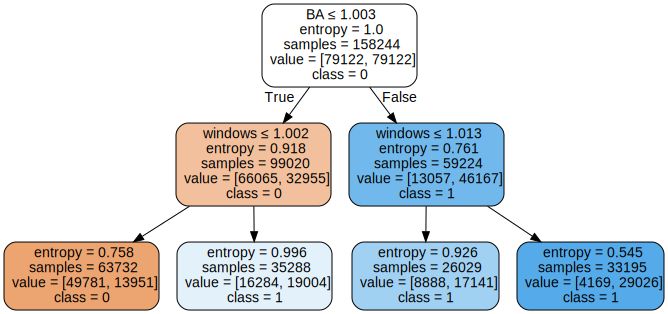

In [46]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import graphviz

decision_tree_model = DecisionTreeClassifier(
    criterion='entropy', 
    max_depth=2, 
)

decision_tree_model.fit(x_train, y_train)

dot_data = export_graphviz(decision_tree_model, out_file=None, 
                           feature_names=x_train.columns,
                           class_names=["0", "1"],  # Replace with your class labels
                           filled=True, rounded=True, special_characters=True)

graph = graphviz.Source(dot_data)
graph.view()  

graph